# EECS 253 ML for Signal Processing
# Lecture 1: Introduction to Python, Pandas, and Tensorflow/Keras

# Initialization and loading data
These are the basic steps at the start of any project

In [ ]:
#this is called "magic". It is not really necessary, but good because someday there will be tensorflow3
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#You will use these basic imports for everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

You have to "run" each code segment in the jupyter notebook if you need the result for segments farther down.  You can click the little arrow that appears in the brackets at the top of each segment, or you can use ctrl-return (or shift-return, which runs the segment and moves to the next one).  The "Runtime" menu at the top of the notebook has all this too.

In [ ]:
#Useful for this example
from matplotlib.dates import DateFormatter

The difference between a **sequence** and a **timeseries** is whether there is a time label for each point.  For example, a sequence could be "anteater, bird, cat, dog, elephant".  There is no time associated to each, although there is an order.  Sequences are important for natural language processing (NLP), but that is not what this course is about.  We are going to discuss timeseries, which generally means that the data are linked to time.  Typically, this is a function of the form $x(t)$, where $x$ is the data, and each item of data occurs at a particular time $t$.  While we can think of $x$ as a function of $t$ (how I just wrote it) or as a mapping from time to data $t \rightarrow x$, we can also think of it (if time is measured in discrete units) as a set of pairs $(t,x)$, which is in fact how it will usually occur within the computer.  Sometimes, time is implicit, in the sense that I can give you a sequence of numbers 1,1,2,3,5,8 and we could use the integer position of each number as if they all had arrived at 1 second intervals, so that in this case $x(3)=2$ and $x(6)=8$.  This is all more complicated than it needs to be, but I think it is helpful to realize that even when time seems not to be an important variable, it is always there somehow.

In [ ]:
#Here is an example (copied from online somewhere) of using explicit time values. Pandas has functions for this.
rng=pd.date_range('2021-03-24','2021-09-01',freq='D')  #freq='D' means each step is one day
ts = pd.Series(np.random.randn(len(rng)),index=rng)  #a pandas Series is not the same as an Array or a DataFrame
ts

,0
2021-03-24,-1.902222
2021-03-25,0.872402
2021-03-26,-0.616306
2021-03-27,-0.045802
2021-03-28,-0.674447
...,...
2021-08-28,0.066602
2021-08-29,-1.041432
2021-08-30,-0.702172
2021-08-31,0.085215


In [ ]:
#turn the series into a pandas dataframe
df = pd.DataFrame({'date':rng,'val':ts})
df

,date,val
2021-03-24,2021-03-24,-1.902222
2021-03-25,2021-03-25,0.872402
2021-03-26,2021-03-26,-0.616306
2021-03-27,2021-03-27,-0.045802
2021-03-28,2021-03-28,-0.674447
...,...,...
2021-08-28,2021-08-28,0.066602
2021-08-29,2021-08-29,-1.041432
2021-08-30,2021-08-30,-0.702172
2021-08-31,2021-08-31,0.085215


Note that the rows of the dataframe in this case are labeled by the timestamp, but the timestamp is also duplicated under the "date" column.  This is ok.  The row names in a dataframe are not actually data. You can leave them out if you want. But if you want to use the timestamps in a calculation, you need to make sure they are in one of the data columns.

Now let's read some real (non-random data).  The following code is also copied from somewhere online.

The source file (comma-separated values CSV) looks like:

```
Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
London,1700,142.8571429,259.7402597
London,1701,144.2857143,262.3376623
London,1702,145.7142857,264.9350649
London,1703,147.1428571,267.5324675
London,1704,148.5714286,270.1298701
```

In [ ]:
#load csv file into a pandas dataframe
pollution = pd.read_csv(
'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv' )
#column names are too long to be useful, so we can change them
pollution = pollution.rename(
columns={
'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))' : 'SPM' ,
'Smoke (Fouquet and DPCC (2011))' : 'Smoke' ,
'Entity' : 'City' }
)
#look at the dataframe; by default shows the first and last lines of the table
pollution


,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [ ]:
#can explore this here, although it's always worthwhile to just open the data in excel or numbers or something
pollution.City.unique()


array(['Delhi', 'London'], dtype=object)

In [ ]:
#basic descriptive statistics.  Note that it does not understand that Year is a date value
#  they apparently have pollution data going back to 1700 in London
pollution.describe()

,Year,Smoke,SPM
count,331.000000,301.000000,331.000000
mean,1864.154079,210.296440,365.970050
std,94.366037,88.543288,172.512674
min,1700.000000,13.750000,15.000000
25%,1782.500000,168.571429,288.474026
50%,1865.000000,208.214286,375.324675
75%,1947.500000,291.818182,512.609209
max,2016.000000,342.857143,623.376623


Here is an example of basic plotting.  Also note that you can index columns of a dataframe using their name, which is why it is a good idea to rename columns to short simple things.

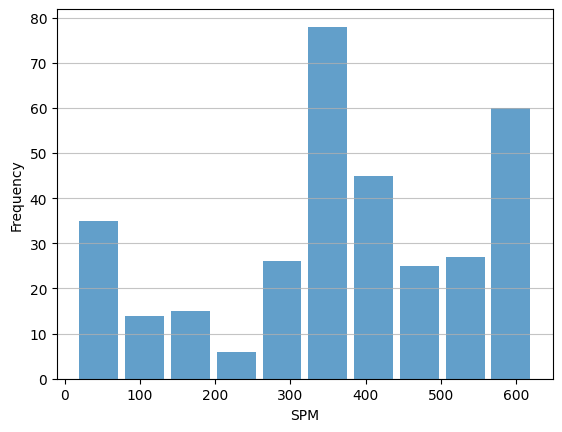

In [ ]:
n, bins, patches = plt.hist(x=pollution[ 'SPM' ], bins= 'auto' ,alpha= 0.7 , rwidth= 0.85 )
plt.grid(axis= 'y' , alpha= 0.75 )
plt.xlabel( 'SPM' )
plt.ylabel( 'Frequency' );  #just like matlab, semicolon prevents output from being displayed

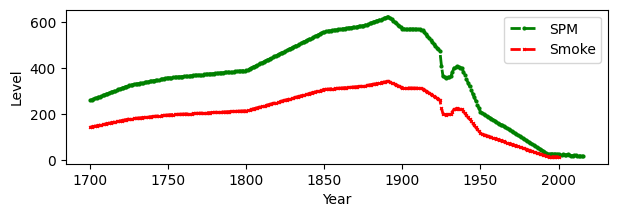

In [ ]:
London_index = pollution['City']=='London'  #select only the london data
#the following are equivalent:
#plt.plot(pollution[London_index]['Year'],pollution[London_index]['SPM'])  #explicit plt.plot(x,y)
#plt.plot('Year','SPM',data = pollution[London_index])   #plot.plot(column1, column2, data = fromdatasource)
#pollution[London_index].plot('Year','SPM')    #pandas makes plot a method of the dataframe
#how to make it fancy
axes = plt.gca()  #you need this to make all the plots overlay on the same graph
pollution[London_index].plot('Year','SPM',color='green', marker='o', linestyle='dashed',
      linewidth=2, markersize=2,figsize=( 7 , 2 ),ax = axes)
pollution[London_index].plot('Year','Smoke',color='red', marker='x', linestyle='dashed',
      linewidth=2, markersize=2,figsize=( 7 , 2 ),ax=axes)
plt.ylabel('Level')
plt.show()

#PART 1: The basics of network learning

##Functions and Networks
A network is just a function that learns.  All networks have an input $x$ and an output $y$, and they compute some function $y=f(x)$. But unlike functions you learn in a math class like sine, cosine, etc, the idea is that you don't actually know what $f(x)$ is when you start.  You are given examples of pairs $(x,y)$ and you have to figure out what $f()$ is from looking at the examples.  In a signal-processing problem, $x$ and $y$ are often timeseries $x(t)$ and $y(t)$, so typically we might have $x(t) = f(y(t))$ which is a "memoryless" function that just maps a single input time-point onto a single output-time point.  We could also have a "predictor" $x(t+1) = f(y(t))$ or $x(t+1) = f(x(t))$.  Or we could have a full functional mapping $f: x \rightarrow y$ that transforms one timeseries $x(t)$ into a completely different timeseries $y(t)$.  

When we say that we "learn" the function $f()$ what we really mean is that we learn some parameters that tell us approximately what the function is.  In other words, $y=\hat{f}(x,w)$, where $w$ is a set of parameters ("weights") that say how $\hat{f}$ behaves.  Why the hat over $f$?  I use the hat to indicate an approximation.  $\hat{f}(x,w)$ is an approximation to the true function $f(x)$.  

For example, if we have a Taylor series
\begin{equation}
\hat{f}(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \ldots
\end{equation}
then the weights or parameters are $w_0, w_1, w_2, \ldots$.  In a Taylor series, we know how to calculate the parameters
\begin{equation}
  w_n = \frac{1}{n!}\frac{d^nf}{dx^n}
\end{equation}
but that works only if someone tells us what the true $f$ and all its derivatives are.

Layered networks are a very special function structure $y=\hat{f}(x,w)$ where for any input $x$, the output $y$ is determined by the weights $w$, and our goal is to learn those weights as best as possible.


##Cost functions
How do we know that we have learned?  We look at our performance.  If there are a set of examples $x$ and $y$ and we have learned some weights $w$ (and thus a function $\hat{f}(x,w)$ we can ask how well we did by comparing the output of the network $\hat{f}(x,w)$ to the desired output $y$ for each value of $x$.  In other words, if we have an example pair $(x,y)$, we can compare $y$ to $\hat{f}(x,w)$ using the squared error (SE)
\begin{equation}
  SE = (y - \hat{f}(x,w))^2
\end{equation}
The smaller the squared error, the better the network did.  But we don't want to do this just for a single example; we want all the examples to be good.  So if we have $N$ different examples $(x_n,y_n)$, then we use the mean squared error (MSE):
\begin{equation}
  MSE = \frac{1}{N} \sum_{n=1}^N(y_n - \hat{f}(x_n,w))^2
\end{equation}
The smaller the MSE, the better we have done on ALL the examples.  Notice that it is the same weights for all the examples.  We are only allowed one set of weights, because we want a single network to approximate a single function.

A note on terminology:  Just like $\hat{f}$, I will use $\hat{y}$ to mean an approximation to the output $y$.  For example, $\hat{y} = \hat{f}(x,w)$ is the approximation, and the MSE is $(1/N) \sum (\hat{y}-y)^2$.  

The MSE is a "cost function" $J$ which determines how well the network $\hat{f}$ is doing.  The lower the cost, the better the network. The cost is determined by the weights, and it can be written
\begin{equation}
  J(w) = \frac{1}{N} \sum_{n=1}^N(f(x_n) - \hat{f}(x_n,w))^2
\end{equation}
The cost also is determined by the particular set of examples $x_n$ that are chosen, but for training a network we think of the examples as being fixed, and we have to change the weights $w$ to do as best we can on the examples we are given.

We just want the cost function to be small, but we don't really care about its value, so usually if the number of inputs $N$ is fixed we just ignore the $N$. Also, to make the math easier, we often divide by 2, so typically we use the cost function:
\begin{equation}
  J(w) = \frac{1}{2} \sum_{n=1}^N(f(x_n) - \hat{f}(x_n,w))^2
\end{equation}


Remember we have two different functions here, both determined by weights $w$.  There is the **network** which gives the particular output for each input $\hat{y}_n = \hat{f}(x_n,w)$, and the **cost function** which gives the average error over all the inputs and outputs $J(w)$.

##Gradient Descent

How do we minimize $J$?  We start with random weights $w$ and gradually try to move them in a direction that will make $J(w)$ smaller.  What direction is that?  Well, suppose there were only 1 weight $w$ that we could change in the network.  Then $dJ/dw$ tells you which way to go.  If $dJ/dw>0$, then increasing $w$ increases $J$, and decreasing $w$ decreases $J$ (which is what we want).  On the other hand, if $dJ/dw < 0$ then increasing $w$ is the right way to go.  Now suppose we are going to change $w$ slowly over time.  In this case, $w(t)$ is now time-varying, and if we want to make the error $J$ small, then we want

\begin{equation}
  \frac{dw}{dt} = - \frac{dJ}{dw}
  \end{equation}
which means that the change in $w$ with time $t$ is in the direction that makes $J$ decrease.  If we do this, then the change in the cost function $J$ with time is given by:
\begin{equation}
  \frac{dJ}{dt} = \frac{dJ}{dw}\cdot \frac{dw}{dt} = - \left( \frac{dJ}{dw} \right)^2 \leq 0
\end{equation}
and because $dJ/dt \leq 0$ that means the cost is decreasing with time.

Remember this equation:  
\begin{equation}
  dw/dt = - dJ/dw
\end{equation}
This is the basis of almost all learning algorithms.
If $w$ is a vector, then so is $dJ/dw$, and the equation is the same.  $J$ is always a scalar, meaning that you can only optimize one thing at a time.

#Gradient Descent on a linear network

The cost function is $J = \sum_n (\hat{f}(x_n) - f(x_n))^2/2$, so we can calculate its derivative:
\begin{equation}
  dJ/dw = \sum_n (\hat{f}(x_n)-f(x_n))\frac{d\hat{f}(x_n)}{dw}
\end{equation}
(now you see why we divided by 2; makes the extra derivative term go away).

The simplest possible network is just a linear function with a scalar output
\begin{equation}
  \hat{f}(x_n) = w^Tx_n
\end{equation}
and for this network,
\begin{equation}
  \frac{d\hat{f}(x_n)}{dw} = x_n
\end{equation}
So then we have
\begin{equation}
   dJ/dw = \sum_n (\hat{f}(x_n)-f(x_n))x_n
\end{equation}
  The error for a single example $x_n$ is $\delta_n = \hat{f}(x_n) - f(x_n)$, so we can write $dJ/dw = \sum_n \delta_n x_n$.

To do gradient descent, we want $dw/dt = - dJ/dw$, but it is ok if the gradient descent just goes "on average" downhill.  So rather than calculating the sum over all the inputs, we can set $dw/dt = -\delta_n x_n$ for one input at a time.  In fact, since inputs come in at discrete times, this is usually written
\begin{equation}
  \Delta w(n) = w(n+1) - w(n) = -\delta_n x_n
\end{equation}
which is the typical single-layer linear network learning rule.  This is sometimes called the Least-mean-square (LMS) rule or the *Widrow-Hoff* algorithm, from the first publication of its use.

The LMS rule $\Delta w(n) = -\delta_n x_n$ is a "difference equation" which is only an approximation to the true differential equation $dw/dt = - dJ/dw$.  To make sure we do not drift too far from the correct answer (the differential equation) we need it to average out, so set a small learning rate $\gamma$ and use
\begin{equation}
  \Delta w(n) = -\gamma \delta_nx_n
\end{equation}
If the examples $x_n$ come in a discrete timeseries $x_n = x(t_n)$, then we can write
\begin{equation}
  \Delta w(t) = -\gamma \delta(t) x(t)
\end{equation}

A compromise between using the full gradient $\sum_n (\hat{f}(x_n)-f(x_n))x_n$ and the single-example approximate gradient $-\gamma \delta_nx_n$ is to use **batch learning**.  For batch size $B$ we use
\begin{equation}
  \Delta w(k) = -\gamma \sum_{n=kB}^{(k+1)B} \delta_n x_n
\end{equation}
so that the direction is the average of a batch of examples.  This seems to improve learning stability and allows the learning rate $\gamma$ to be faster.

Now let's do this for a two-input, one-output linear network.

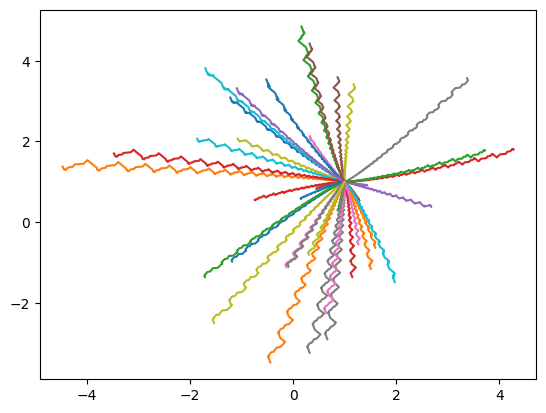

array([[0.99999889, 0.99999937]])

In [ ]:
#Simple example of linear learning
npoints = 20  #the number of examples
x = np.random.randn(2,npoints)  #these are the input examples, chosen randomly
f = np.sum(x,axis=0)   #the right answer is just the sum

for trials in range(1,40):  #try this for many different initial weights
  w = 2*np.random.randn(2)  #choose a random initial set of weights
  w = w.reshape(1,2)        #python weirdness: change the vector into a 1D array
  wvals = w                 #going to save all the weights along the way
  gamma = 0.01              #learning rate.  Batch size is 1 here.
  for i in range(1,100):
    for n in range(npoints):
      delta = np.dot(w,x[:,n]) - f[n]  #the error for this example
      w = w - gamma * delta * x[:,n]   #gradient descent learning rule
      wvals = np.append(wvals,w,axis=0)    #save the weights

  plt.plot(wvals[:,0],wvals[:,1])  #plot the learning for this trial
plt.show()   #plot all the trials for all the different initial weights
w

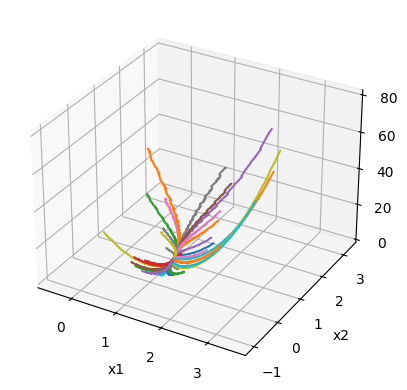

In [ ]:
#same thing for 3D plot showing the cost function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

npoints = 20  #the number of examples
x = np.random.randn(2,npoints)  #these are the input examples, chosen randomly
f = np.sum(x,axis=0)   #the right answer is just the sum

for trials in range(1,40):  #try this for many different initial weights
  w = np.random.randn(2)+[1,1]  #choose a random initial set of weights
  w = w.reshape(1,2)        #python weirdness: change the vector into a 1D array
  J = np.sum(np.square(np.matmul(w,x) - f)/2.0)

  wvals = w                 #going to save all the weights along the way
  jvals = J
  gamma = 0.01              #learning rate
  for i in range(1,100):
    for n in range(npoints):
      delta = np.dot(w,x[:,n]) - f[n]  #the error for this example
      w = w - gamma * delta * x[:,n]   #gradient descent learning rule
      J = np.sum(np.square(np.matmul(w,x) - f)/2.0)

      wvals = np.append(wvals,w,axis=0)    #save the weights
      jvals = np.append(jvals,J)

  plt.plot(wvals[:,0],wvals[:,1],jvals)  #plot the learning for this trial
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J');
plt.show();   #plot all the trials for all the different initial weights


##A First Keras network

In [ ]:
#Lets do the same thing using Keras
#first, build the network
import keras

model = keras.Sequential()
model.add(keras.Input(shape=(2,)))  #shape is a 2-element flat vector (one row of input matrix)
model.add(keras.layers.Dense(1,use_bias=False))  #make this a simple linear model
model.summary()
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=opt, loss = 'mse')

#now, train the network
npoints = 100  #the number of examples
x = np.random.randn(npoints,2)  #these are the input examples, chosen randomly
y = np.sum(x,axis=1)   #the right answer is just the sum
model.fit(x,y,epochs=10,batch_size=1)

#see if it learned
print(model.weights[0][:])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6267
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1090
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8459e-04
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0156e-05
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1787e-07
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0346e-09
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6528e-11
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4491e-12
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4831e-12
tf.Tensor(
[[0.99999964]
 [1.000001  ]], shape=(2, 1), dtype=float32)


<Axes: >

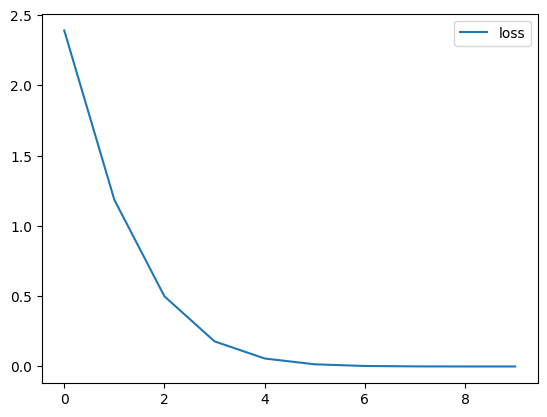

In [ ]:
#look at the cost function for each epoch
losses = pd.DataFrame(model.history.history)
losses.plot()

#Multilayer Networks


Now here is where it gets fun.  Let's make a multilayer network by alternating linear networks with nonlinearities.   Each layer is like a sandwich, with a nonlinearity $\sigma$ between each linear layer.  The network is a sequence of linear $W_k$ and nonlinear $\sigma$ components.  In this case, each layer has multiple inputs and multiple outputs, so instead of the scalar function we used before $w^Tx$ we now have each layer performing a matrix multiply $Wx$ where $W$ is an $n \times m$ matrix meaning there are $m$ inputs and $n$ outputs.

For example, a two layer network is $\hat{f}(x) = W_1\sigma(W_2x)$, or sometimes $\hat{f}(x) = \sigma(W_1\sigma(W_2x))$ depending on whether we want the nonlinearity at the output as well.  The first (bottom) layer starts with the input $x$ and calculates the "hidden" layer as $h = \sigma(W_2x)$.  Then the next layer starts with the hidden layer $h$ and calculates the output layer as $y=W_1h$.  In this case, $x$, $h$, and $y$ are vectors.

Note that only the linear layers have trainable weights.  The nonlinearity is fixed.  Also note that only the linear layers can mix their inputs.  The nonlinearity in this case is a scalar function that is applied separately to each output of the layer below.

Figuring out $dJ/dw_1$ is easy, because we could just think of $\sigma(w_2^Tx)$ as the input $x'$ (with a change of variable from $x \rightarrow x'$).  In other words, $dJ/dW_1 = \delta h$, just like we did before for the single layer network.

But what is $dJ/dW_2$?  Here, we can use the chain rule:
\begin{equation}
  \frac{dJ}{dW_2} = \sum_n (\hat{f}(x_n) - f(x_n))\frac{d\hat{f}}{dW_2}
  \end{equation}
  and
\begin{equation}
  \frac{d\hat{f}}{dW_2} = W_1\sigma'(W_2x)x
  \end{equation}
  so
\begin{equation}
  \frac{dJ}{dW_2} = \sum_n (\hat{f}(x_n) - f(x_n))W_1\sigma'(W_2x_n)x_n
  \end{equation}
remembering that $\delta_n = \hat{f}(x_n) - f(x_n)$, we can now write
\begin{equation}
  \frac{dJ}{dW_2} = \sum_n \delta_n W_1^T\sigma'(W_2x_n)x_n
  \end{equation}

This means that for each example, we need to change the weights at each timestep
\begin{equation}
  \Delta W_1(t) = - \gamma \delta(t) \sigma(w_2^Tx(t))
\end{equation}
\begin{equation}
  \Delta W_2(t) = -\gamma \delta(t) W_1^T \sigma'(W_2x(t))x(t)
\end{equation}
A simpler way to write this is to notice that this is the same as the weight update equation for $W_1$ but with a modified $\delta$.  So if we set $\delta_2 = \delta W_1^T \sigma'$, then we can write the update equation for $W_2$ in the same form as:
\begin{equation}
  \Delta W_2(t) = -\gamma \delta_2(t) x(t)
\end{equation}
We can do this for all the layers, so that for some set of weights in a middle layer we will have
\begin{equation}
  \Delta W_k(t) = -\gamma \delta_k(t) z_k(t)
\end{equation}
where $z_k(t)$ is the value at the input to that layer, and $\delta_k(t)$ is the "backpropagated" error from the prior layer, given by:
\begin{equation}
  \delta_k(t) = \delta_{k-1}(t) W_{k-1}^T \sigma'(W_kz_k)z_k(t)
  \end{equation}

The way to implement this is at every time $t$, there is a forward pass through the network to find all the $z_k$'s, and then a backward pass starting from the output error $\delta$ to find all the $\delta_k$'s, then an update/learning step to modify the weight matrices $\Delta W_k$.  The entire process repeats for every input example.  

This is the backpropagation algorithm.

But in the end it is nothing more than using gradient descent:
\begin{equation}
  \frac{dw}{dt} = - \gamma \frac{dJ}{dw}
\end{equation}

Tensorflow basically does this automatically.  There is magic inside python that allows it to figure out $dJ/dw$ for any network you build (it just uses the chain rule).  Once it knows that, then it can do gradient descent on pretty much anything to find a set of weights that is always better than wherever you started.

##Why not multilayer linear networks?

If all the layers are linear, then $W_1W_2W_3x = W_*x$ for some matrix $W_* = W_1W_2W_3$, so in that case we don't gain anything by having more than one layer.  The way we gain power from multiple layers is by inserting nonlinearities, but we still use linear components in each layer.  So the structure is $W_1 \sigma(W_2\sigma(W_3 ... (x)...)$ which is sort of a ``sandwich'' structure, or LNL (linear-nonlinear-linear) structure.  The goal is to train the weights in each linear layer so that the overall network approximates the function $f(x)$ that we want $\hat{f}(x,w_1,w_2, \ldots) = W_1 \sigma(W_2 ... (x)...)$.



In [ ]:
#BAD EXAMPLE:  Multilayer linear network
import keras

model = keras.Sequential()
model.add(keras.Input(shape=(2,)))  #shape is a 2-element flat vector (one row of input matrix)
model.add(keras.layers.Dense(2,use_bias=False))  #make this a simple linear model
model.add(keras.layers.Dense(1,use_bias=False))  #make this a simple linear model
model.summary()
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=opt, loss = 'mse')

#now, train the network
npoints = 100  #the number of examples
x = np.random.randn(npoints,2)  #these are the input examples, chosen randomly
y = np.sum(x,axis=1)   #the right answer is just the sum
model.fit(x,y,epochs=10,batch_size=1)

#see if it learned
W2 = model.weights[0][:].numpy()
W1 = model.weights[1][:].numpy()
print(W2)
print(W1)
print(W1.T@W2.T)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5618
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4086e-05
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4799e-10
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6170e-14
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4736e-14
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7199e-14
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0045e-14
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7613e-14
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3979e-14
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3705e-14
[[-0.97003686 -0.82263505]
 [ 0.19443414 -0.6063848 ]]
[[ 0.28904125]
 [-1.5564384 ]]
[[1.0000002 1.0000001]]


#PART 2:  A Real Network Signal Processing Example

# EEG Data Analysis
load the data (117 seconds of EEG) and create timeseries

This is from the OpenML.org online library.  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.  The features correspond to 14 EEG measurements from the headset, originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order.

Here is a sample of the file.  Note that the eye states are actually '1' and '2', not '1' and '0' as claimed in the openML documentation:

```
"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","Class"
4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.9,4393.85,1
4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.1,1
4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
4328.72,4011.79,4296.41,4155.9,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.9,4627.69,4210.77,4244.1,4212.82,4288.21,4632.82,4398.46,1
4321.03,4004.62,4284.1,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,1
```


In [ ]:
from sklearn.datasets import fetch_openml
eeg = fetch_openml(data_id=1471,as_frame= True )  #returns a dataframe
#URL for the dataset: https://openml.org/search?type=data&status=active&id=1471
#this timeseries dataset does not actually include time.  So we will synthesize timestamps
max_time = 117
num_eeg_points = len(eeg['data'])
increment = max_time / num_eeg_points
index = np.linspace(start=0, stop=max_time, num=num_eeg_points)
ts_index = pd.to_datetime(index, unit= 's' ,origin = '2022-1-3 15:30:00')  #convert to seconds
#note that all dates start at january 1, 1970, unless you specify a different origin
v1 = pd.Series(name= 'V1' , data=eeg[ 'data' ][ 'V1' ].values, index=ts_index)  #turns the dataframe into a Series
v1

,V1
2022-01-03 15:30:00.000000000,4329.23
2022-01-03 15:30:00.007810831,4324.62
2022-01-03 15:30:00.015621901,4327.69
2022-01-03 15:30:00.023432732,4328.72
2022-01-03 15:30:00.031243801,4326.15
...,...
2022-01-03 15:31:56.968756199,4281.03
2022-01-03 15:31:56.976567268,4276.92
2022-01-03 15:31:56.984378099,4277.44
2022-01-03 15:31:56.992189169,4284.62


In [ ]:
# there is an artifact at 1:10, so select a slice of time before
slicing = (v1.index >= '2022-1-3 15:30:08' ) & (v1.index <= '2022-1-3 15:31:10.000000000' )
#the result is still a pandas series, with timestamp, value pairs.
v1[slicing]

,V1
2022-01-03 15:30:08.006208658,4289.74
2022-01-03 15:30:08.014019728,4284.10
2022-01-03 15:30:08.021830559,4280.00
2022-01-03 15:30:08.029641390,4289.74
2022-01-03 15:30:08.037452459,4298.46
...,...
2022-01-03 15:31:09.962547541,4289.74
2022-01-03 15:31:09.970358610,4283.08
2022-01-03 15:31:09.978169441,4284.62
2022-01-03 15:31:09.985980272,4289.23


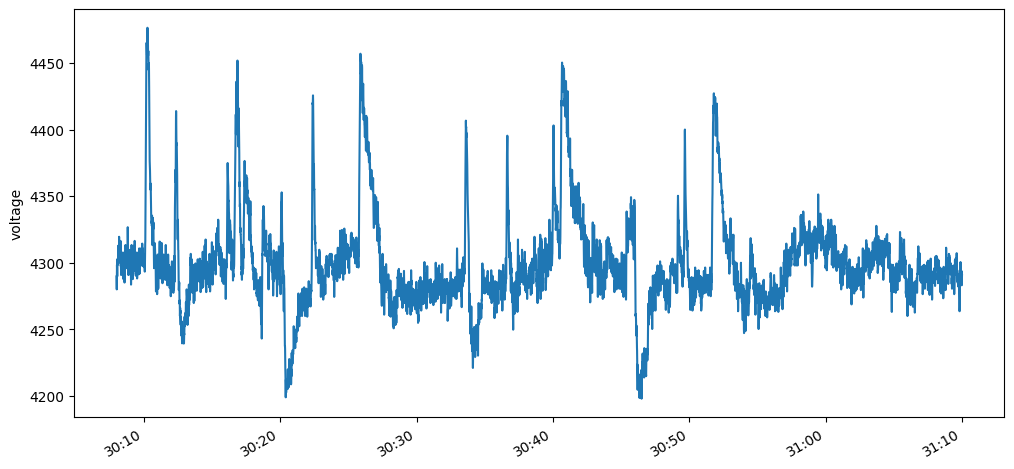

In [ ]:
#show the eeg data from channel v1
date_formatter = DateFormatter( "%M:%S" )  #just show minutes:seconds
ax = v1[slicing].plot(figsize=( 12 , 6 ))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel( 'voltage' );

<Axes: >

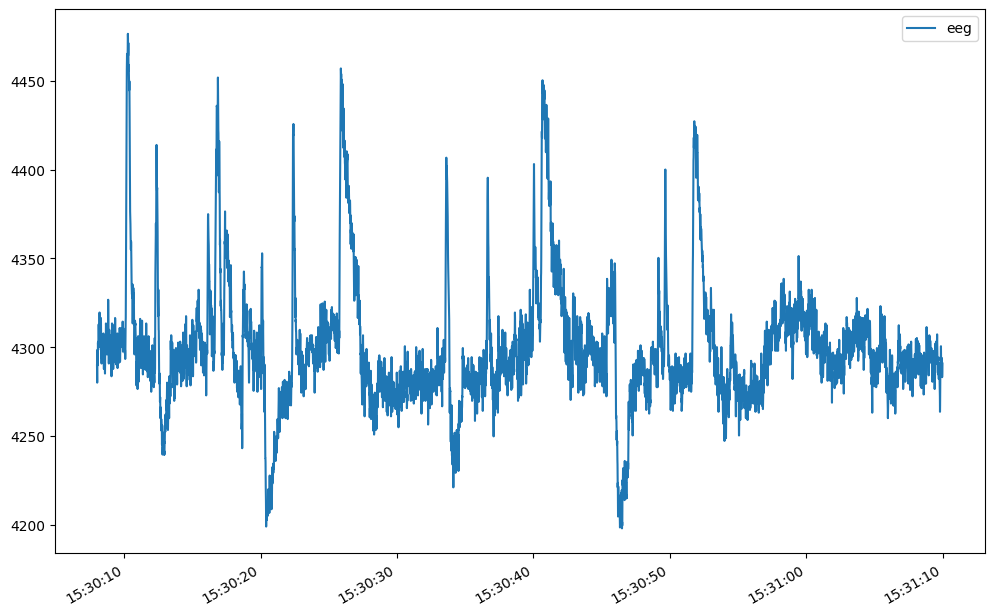

In [ ]:
#make a dataframe from the slice
df = v1[slicing].to_frame(name="eeg")
df.plot(figsize=(12,8))

##Your first timeseries predictor

###Training, Test, and Validation sets
The purpose of almost all machine learning models is to predict something they have not seen before, or something they were not trained on.  This is called "generalization".  For example, the TRAINING SET to the network might include pairs of inputs and outputs $(x_n, f_n)$ and we want the network to output something close to $f_n$ every time it sees $x_n$.  But we also want it to do something reasonable on samples $(x,f)$ that it has not seen before.  Generalization is like interpolation or extrapolation, it tries to guess the value of $f(x)$ from nearby values that it has seen.  When we "fit" a network model to data samples, we are trying to find a smooth model that goes through the samples in a way that it gets the in-between values right.

If a network is powerful enough and is trained long enough, it can memorize the training set perfectly without trying to find a smooth function that interpolates well.  To avoid this, we can test the interpolation and stop the training if the interpolation is starting to get worse.  To do that, we use a TEST SET that the network has not seen before.  This is just a set of pairs $(x_k, f_k)$ that is new and is not part of the training set.  We look at the network output $\hat{f}(x_k)$ and see if this is close to $f_k$.  

Since we only have a finite number of examples in our training set, the network probably needs to train more than once on the training set.  Each time we call it an "epoch".  After each epoch of training on the training set, we look at the error on the test set to see how the network is doing.  Usually, the performance on both the training and test sets will get better and better, but after some point the training set continues to get better while the test set starts to get worse.  This is called "overfitting" the training set.  When that starts to happen, we need to stop learning (or use a network that has fewer hidden units so that it is not powerful enough to overfit).

In [ ]:
#will attempt to predict the last test_size elements in the series
#The last test_size elements are the test set.  Everything else is the training set
test_size = 180
test_ind = len(df)-test_size  #index of the first element to predict -1
train=df.iloc[:test_ind]  #train on everything before that
test=df.iloc[test_ind:]   #test on everything after that

In [ ]:
#scale the range
# this is really important so that the inputs to the network are between about -1 and +1
#  that keeps the data from saturating the nonlinearities in the network.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)  #scale the test set using the training set scaler
                                      #(because we don't know the test set beforehand)
                                      #NOTE: scaler.transform() returns a numpy array, even for dataframe input

When we use multiple past samples to predict a future sample, the training samples are vectors of overlapping past samples.  For example, the first example has $X(0) = (x(-N) \ldots x(-1))$ as input, to predict output $Y(0) = x(0)$.  The second has $X(1) =  (x(1-N) \ldots x(0))$ as input, to predict output $Y(1) = x(1)$, and so on.  TimeSeriesGenerator creates this set of examples (X(t), Y(t)) from the original input timeseries, where $X(t) = (x(t-N)\ldots x(t-1))$, and $Y(t) = x(t)$.

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
predict_length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = predict_length, batch_size=1)
#X,y = generator[t] produces an array {[X(t-N)...X(t-1)], [X(t)]}

A note about the various variables:

predict_length is the number of past samples we are using to make the next prediction.  In other words, we use $x(t-1), x(t-2), \ldots, x(t-predict\_length)$ to predict $x(t)$.

When we build the model, there is another variable n_features which is the dimensionality of the input.  In other words, $x(t)$ could be a vector of 4 elements.  In this case n_features is 4, and the inputs to the network are the set of past samples $x(t-1), x(t-2), \ldots, x(t-predict\_length)$, each of which is a 4-element vector.  So there are actually n_features * predict_length inputs to the network.  

If we are trying to predict $x(t)$, then there will be n_features outputs of the network, one for each element of the vector $x(t)$.

##Create the network model using tensorflow and Keras
There are many possible models.  Some will work much better than others.  For now we are going to pick one at random (and it will not work very well).  This is network with two trainable layers, and a linear output unit. We will discuss other recursive models later.

The Adam optimizer is a stochastic gradient descent method that sets learning rates for parameters based on the history of the gradient and the variance in the gradient for each parameter.
\begin{equation}
\Delta w = -\gamma E[\nabla f(w)] \cdot E[(\nabla f(w))^2]^{-1/2}
\end{equation}
where $\nabla f(w)$ is the gradient of the output of the network with respect to the weights $w$, and the expectations $E[]$ are decaying averages of recent values of the gradient and squared gradient.
("Adam: A Method for Stochastic Optimization",
Diederik P. Kingma and Jimmy Ba,
2017)

The mean-squared error (mse) loss function applies to things that look like regressions, where one continuous variable depends on other continuous variables.  It is very susceptible to bias from outliers and tends to have slow learning when errors are small.  There are other cost functions we will learn about later.

In [ ]:
##First, lets start with a linear network, which will learn a linear filter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()  #method to build the network from the bottom, one layer at a time
#if you don't flatten, will get a separate single-input net for each time value
model.add(Flatten(input_shape = (predict_length, n_features)))  #defines the shape of the input
model.add(Dense(1))  #single output linear unit is the top layer
model.compile(optimizer='adam', loss='mse')  #specify the cost function and the descent rule
model.summary()  #show the model layer sizes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7745/7745 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0011
Epoch 2/5
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 6.1416e-04
Epoch 3/5
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.1518e-04
Epoch 4/5
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8361e-04
Epoch 5/5
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5460e-04


<Axes: >

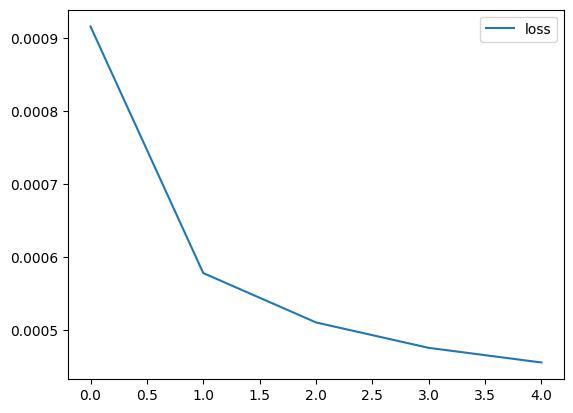

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


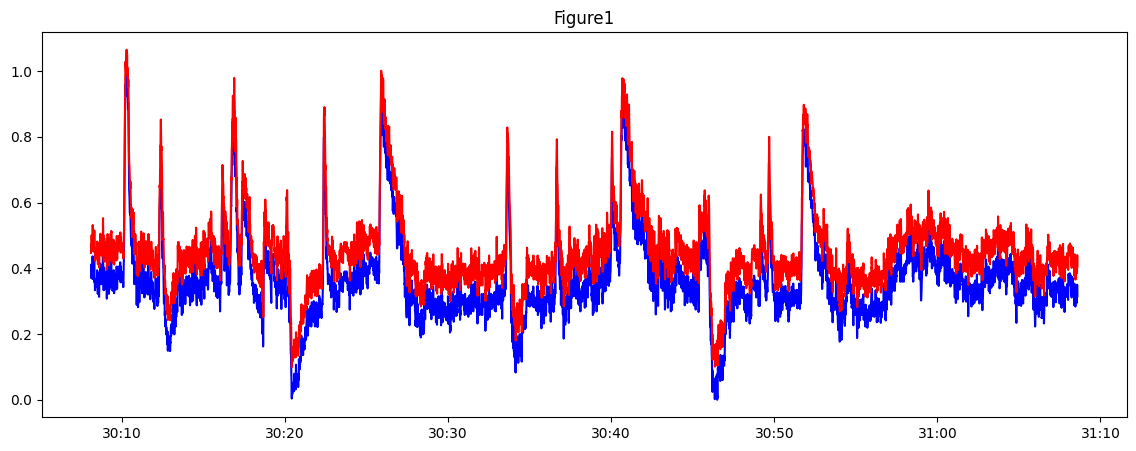

In [ ]:
#get the model predictions for all timepoints
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
#train_predict is for predicting as data=predicted_outputs)
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
#train_orig = original data, as data=scaled_train
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b') #blue = actual data
plt.plot(train_predict+0.1,'r') #red = predicted data
plt.show()

A linear network predictor is a linear function and and equivalent to a simple linear system.  Linear systems can be described by their impulse response.  For instance, any time-invariant linear filter can be written as $y(t) = \int h(\tau) x(t-\tau) d\tau$ where $h(t)$ is called the impulse response because $h(t) = \int h(\tau) \delta(t-\tau) d\tau = h(t)$ is the response to delta-function input.   

So in a linear filter with impulse response  $h(t)$,  for any input $x(t)$ you can predict the output from the convolution of $h$ with the input $x$ using $y(t) = \int h(\tau) x(t-\tau) d\tau$.  This is true because you can think of $h$ as a linear superposition of time-lagged delta functions $h(t) = \sum_i h(t_i)\delta(t-t_i)$, or in the limit
\begin{equation}
h(t) = \int h(\tau) \delta(t-\tau) d\tau
\end{equation}
\begin{equation}
y=h*x = \int h(\tau) \delta(\eta - \tau) x(t-\eta) d\tau d\eta  
\end{equation}
\begin{equation}
y(t) = \int h(\tau) x(t-\tau) d\tau  
\end{equation}

So we can calculate the impulse response by looking at, you guessed it, the response to an impulse.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


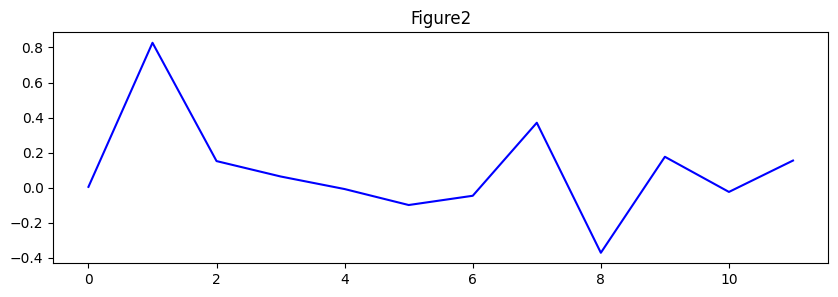

In [ ]:
#calculate the impulse response
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()

##Same thing for a simple nonlinear network

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

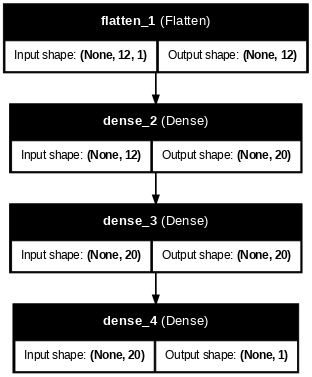

In [ ]:
##Here is a simple nonlinear network.  Three-layers, with a ReLu nonlinearity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import plot_model

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()  #method to build the network from the bottom, one layer at a time
#if you don't flatten, will get a separate single-input net for each time value
model.add(Flatten(input_shape = (predict_length, n_features)))  #defines the shape of the input
model.add(Dense(20, activation = 'relu'))  #20 ReLu nonlinear hidden units is the next layer
model.add(Dense(20, activation = 'relu'))  #20 ReLu nonlinear hidden units is the next layer
model.add(Dense(1))  #single output linear unit is the top layer
model.compile(optimizer='adam', loss='mse')  #specify the cost function and the descent rule
model.summary()  #show the model layer sizes
plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)  #show a picture of the network

Early stopping criteria will save you a lot of time.  It basically stops the network when the error on the validation (test) set is no longer decreasing.  The "patience" parameter says how many times you make sure it is nondecreasing before you stop.  Patience > 2 is a good idea.

In this case, the test set is small (just the last 18 points in the series) so this is not a particularly good validation.  In fact, one could argue that the early stopping criteria risks overfitting the test set.  To be completely honest with this sort of thing, the early-stopping criterion should not depend on the test set, but should depend on a different "validation set".  Remember that in a real prediction situation, you do not know the test set in advance, and thus could not use it for early stopping or anything else.

Earlystopping will be set to monitor the validation-set loss (mse) using the internal variable 'val_loss'.  This is the default.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)

The next part is where all the work happens.  Before you do this, go to the menus at the top of your Jupyter notebook and select Edit/NotebookSettings and choose either a graphics processing unit (GPU) or tensor processing unit (TPU).  Then in the upper right, click on connect to have google load an appropriate hardware platform for you.  If you don't do this, it will still run but much slower.  This is probably also faster than most desktop machines available to you, although if you have something with a cuda-enabled gpu or two, then you might be able to keep up.  Note that Mac computers do not use cuda-compatible gpu's, so you are out of luck with hardware acceleration under tensorflow2/python3 on your local mac computer.

##To ensure that your homework outputs are your own, please set the random seed for your simulations to be your UCI ID number (or some other number unique to you).

In [ ]:
#for all homework, please set the seeds of your random number generators to your UCI ID number
np.random.seed(57999719)
tf.random.set_seed(57999719)

model.fit(generator,epochs=8,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 4.6140e-04 - val_loss: 3.6533e-04
Epoch 2/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 4.3801e-04 - val_loss: 1.6947e-04
Epoch 3/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - loss: 4.1190e-04 - val_loss: 2.4815e-04
Epoch 4/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 3.8542e-04 - val_loss: 4.0600e-04


The history stores the timeseries of the loss (mse on the training set) and val_loss (mse on the validation set)

EarlyStopping will be triggered if the loss (cost) on the test set (val_loss) starts to rise.

<Axes: >

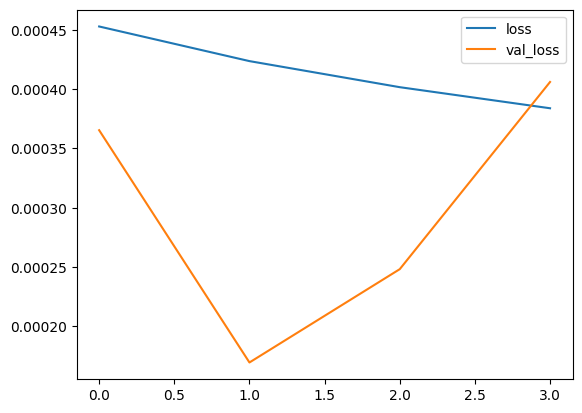

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Compare the one-step-ahead predictions to the true data.  This is not really a fair measure of the quality of the network prediction.  A "copylast" operation will usually do pretty well at this task, for any even partly smooth function.

It's always good to do this to make sure things are not far off.  You can also look for patterns of errors, for instance at peaks or areas of rapid change in the function.

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


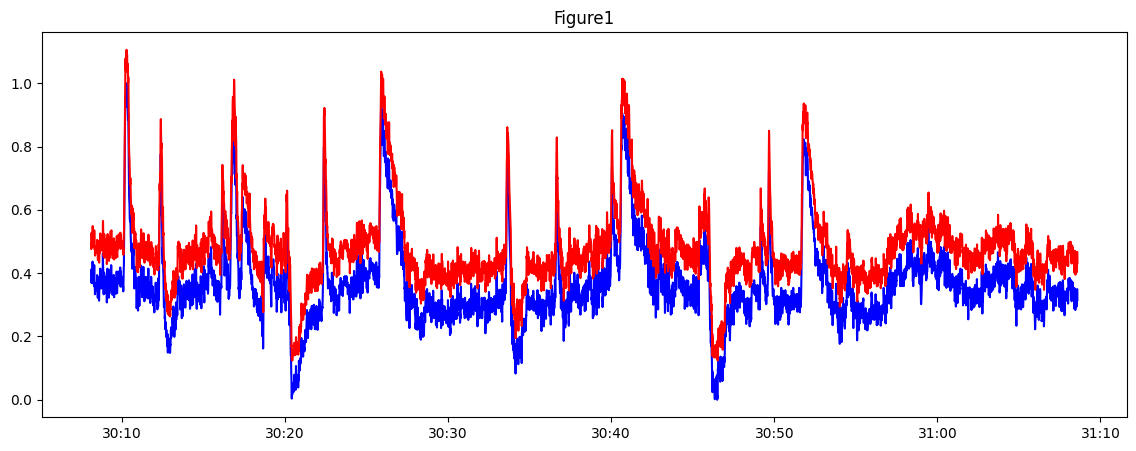

In [ ]:
#get the model predictions for all timepoints
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict+0.1,'r')
plt.show()


The last comparison is not really fair, because we are comparing the networks performance on the TRAINING SET to the true TRAINING SET.  It should do pretty well, because it can overfit.  Better is to show the comparison on the test set, although the test set is much smaller.

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


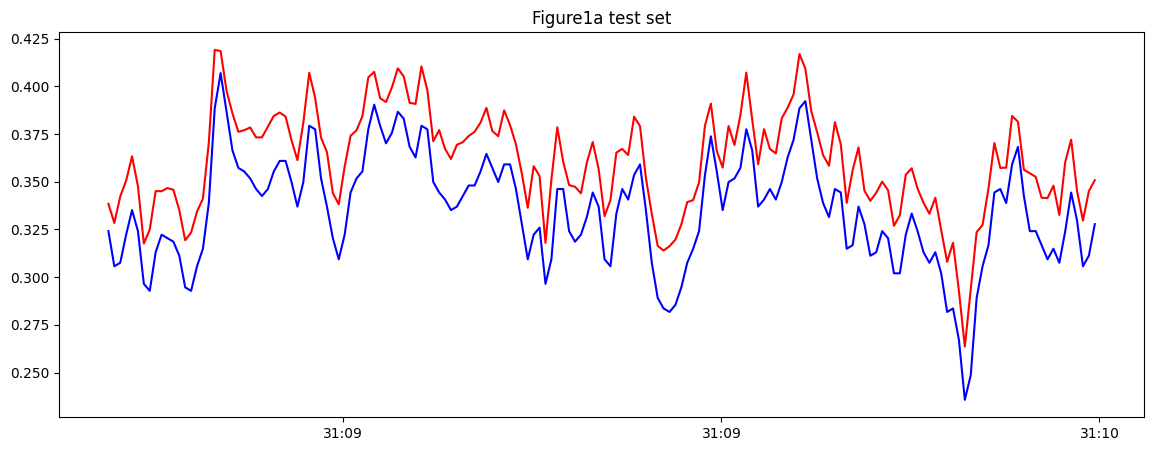

In [ ]:
#get the model predictions for all timepoints
#this time, do it on the test set rather than the training set
predicted_outputs = model.predict(validation_generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
test_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=test.index[predict_length:])
test_orig = pd.DataFrame(data=scaled_test[predict_length-1:-1], columns=['eeg'], index=test.index[predict_length:len(scaled_test)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1a test set')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(test_orig,'b')
plt.plot(test_predict+0.01,'r')
plt.show()


##Impulse response of a nonlinear network


The impulse response does not really make sense for a nonlinear network, since the network function $H[x(t)]$ is not a superposition of delta functions, or anything else that you recognize.

But we can still calculate the impulse response, while being aware that it is NOT TRUE that the output of the filter is the convolution of the impulse response with the input:  $y(t) \neq h(t) * x(t)$.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


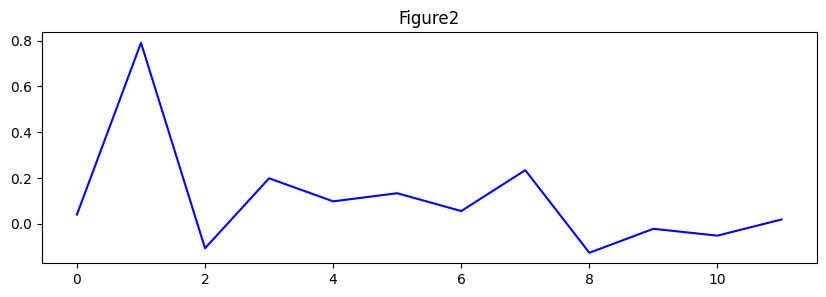

In [ ]:
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()

Here we look at the iterated predictions.  This means using $x(t-N) \ldots x(t-1)$ to predict $\hat{x}(t)$, then using $\hat{x}(t)$ to predict $\hat{x}(t+1)$, and so on.  Each time, we can compare to how well we would have done with full knowledge up to that time.

The farther in the future you predict this way, the farther you will drift away from the right answer.  But it is worth seeing how well you do.  This is another good test of a predictive dynamic model.  How long can it run by itself and still make good predictions?

<Axes: title={'center': 'figure3'}>

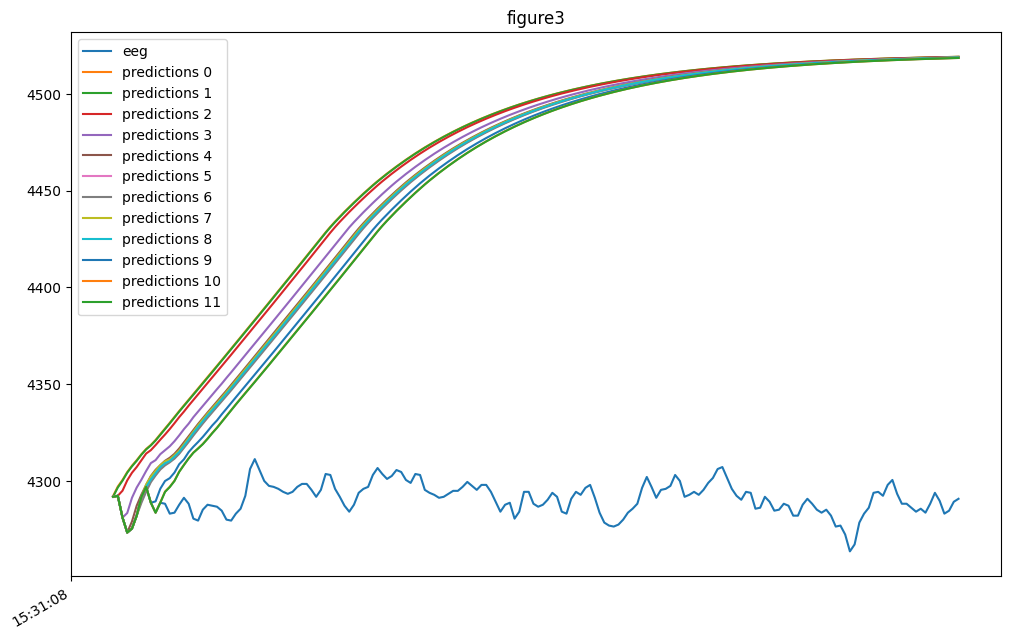

In [ ]:
test_predict = test.copy()
for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):

      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch, verbose=0)[0]

      # store prediction
      test_predictions.append(current_pred)

      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8),title='figure3')

In [ ]:
#we typically use the built-in activation functions sigmoid(), relu(), LSTM(), etc...
#but you can create your own and it works fine.  When possible, use Keras "backend" functions
from tensorflow.keras import backend as K

def custom_activation(x):
    return (K.sigmoid(x)*K.sigmoid(x))  #sigmoid squared


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

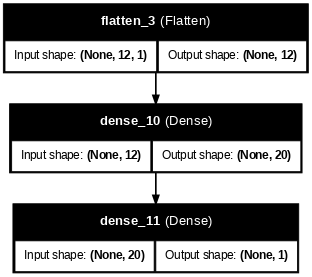

In [ ]:
##Here are some options for a slightly more complicated network
from tensorflow.tools.docs.doc_controls import do_not_doc_inheritable
from matplotlib import use
from tensorflow.python.keras.engine.base_layer_utils import uses_keras_history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from keras.utils import plot_model

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()
use_custom = 0
if use_custom == 1:
  model.add(Flatten(input_shape = (predict_length, n_features)))
  model.add(Dense(20, activation = custom_activation))
else:
  #if you don't flatten, will get a separate single-input net for each time value
  model.add(Flatten(input_shape = (predict_length, n_features)))
  model.add(Dense(20, activation = 'relu')) #non linear layer
model.add(Dense(1)) #single output linear layer
model.compile(optimizer='adam', loss='mse')
model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)

#Homework 1
Repeat the above analysis for the following cases:
1. a Dense Relu network layer with 50 hidden nodes
2. a custom activation network layer  with 20 hidden nodes
3. a custom network layer with 50 hidden nodes
4. a Dense linear network layer with 50 hidden nodes and using a time buffer of predict_length = 24 timepoints.

What conclusions can you draw from looking at the results?

Please submit your results in three separate files:  
1.  the original ipynb jupyter notebook,  
2.  a pdf printout of the notebook with all the calculated results, and
3.  a pdf of Figure1 for each of the 4 networks.  This is the most important, because it is the first thing I will look at.

 Remember to insert a unique id value (perhaps your UCI id number) as the random seed for the learning algorithm.  

Upload your homework to canvas prior to the due date.

DO NOT USE COMPRESSION SOFTWARE (.zip .rar, etc).  Please upload 3 separate files (jupyter-ipynb, jupyter-pdf, fig-pdf).  

You can create a PDF using the "File/Print" command from the Colab menu.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,251 (12.70 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

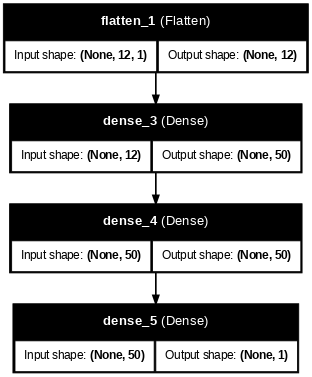

In [ ]:
## Dense Relu Network Layer with 50 Hidden Nodes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils import plot_model

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()  #method to build the network from the bottom, one layer at a time
#if you don't flatten, will get a separate single-input net for each time value
model.add(Flatten(input_shape = (predict_length, n_features)))  #defines the shape of the input
model.add(Dense(50, activation = 'relu'))  #50 ReLu nonlinear hidden units is the next layer
model.add(Dense(50, activation = 'relu'))  #50 ReLu nonlinear hidden units is the next layer
model.add(Dense(1))  #single output linear unit is the top layer
model.compile(optimizer='adam', loss='mse')  #specify the cost function and the descent rule
model.summary()  #show the model layer sizes
plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)  #show a picture of the network

In [ ]:
#adds in early call back
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)

#Generator Section
np.random.seed(57999719)
tf.random.set_seed(57999719)
model.fit(generator,epochs=8,
                    validation_data=validation_generator,
                   callbacks=[early_stop])


Epoch 1/8
7741/7745 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7745/7745 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0018 - val_loss: 2.3600e-04
Epoch 2/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 6.0665e-04 - val_loss: 3.5621e-04
Epoch 3/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.1956e-04 - val_loss: 2.6767e-04


<Axes: >

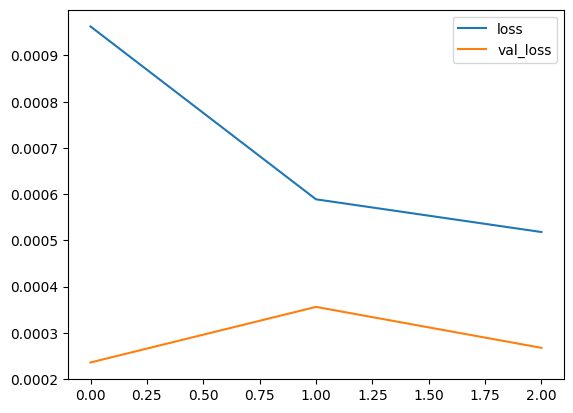

In [ ]:
# Losses Section
losses = pd.DataFrame(model.history.history)
losses.plot()

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


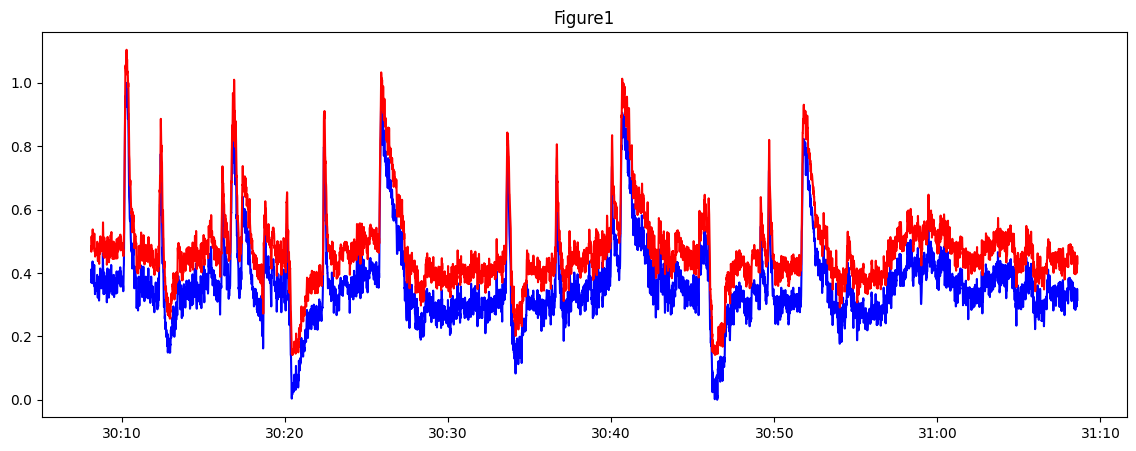

In [ ]:
#get the model predictions for all timepoints
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict+0.1,'r')
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


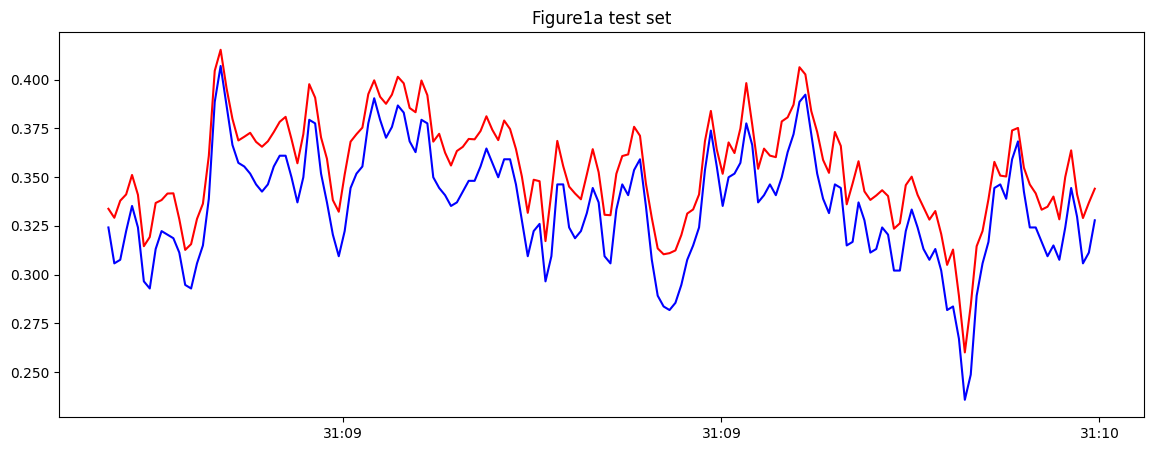

In [ ]:
#get the model predictions for all timepoints
#this time, do it on the test set rather than the training set
predicted_outputs = model.predict(validation_generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
test_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=test.index[predict_length:])
test_orig = pd.DataFrame(data=scaled_test[predict_length-1:-1], columns=['eeg'], index=test.index[predict_length:len(scaled_test)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1a test set')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(test_orig,'b')
plt.plot(test_predict+0.01,'r')
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


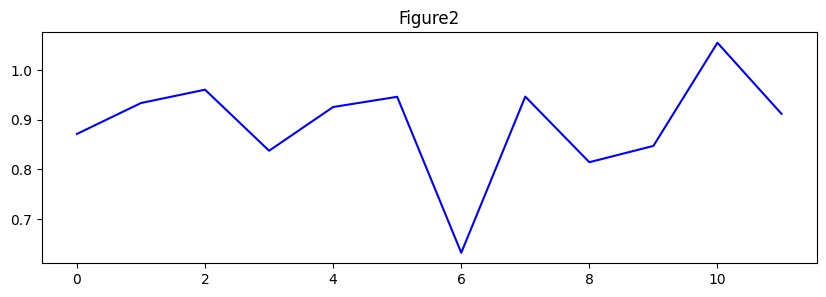

In [ ]:
# Impulse Section
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()

<Axes: title={'center': 'figure3'}>

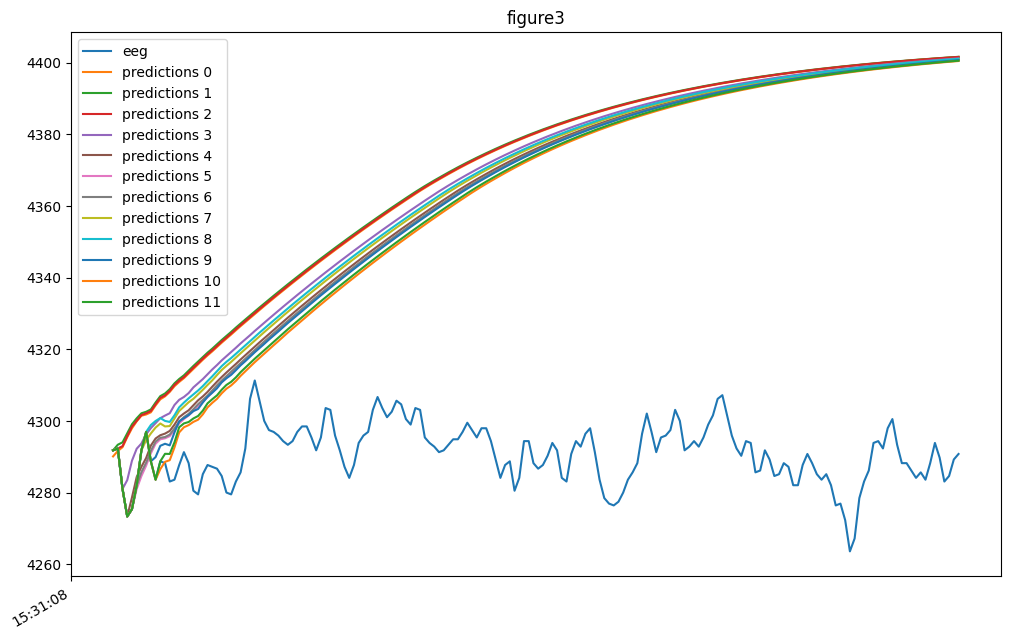

In [ ]:
#Test Prediction of Future Values
test_predict = test.copy()
for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):

      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch, verbose=0)[0]

      # store prediction
      test_predictions.append(current_pred)

      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8),title='figure3')

Question #2 Starts Here

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

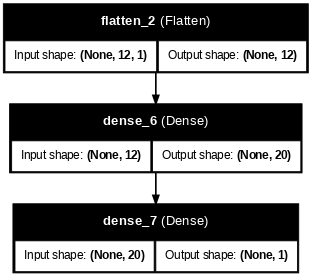

In [ ]:
## a custom activation network layer with 20 hidden nodes
from tensorflow.tools.docs.doc_controls import do_not_doc_inheritable
from matplotlib import use
from tensorflow.python.keras.engine.base_layer_utils import uses_keras_history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from keras.utils import plot_model

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()
model.add(Flatten(input_shape = (predict_length, n_features)))
model.add(Dense(20, activation = custom_activation))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)

In [ ]:
#adds in early call back (didn't have this for linear)
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)


In [ ]:
#Generator Section
np.random.seed(57999719)
tf.random.set_seed(57999719)
model.fit(generator,epochs=8,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0119 - val_loss: 3.6230e-04
Epoch 2/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7.8288e-04 - val_loss: 2.9342e-04
Epoch 3/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 6.4889e-04 - val_loss: 4.4343e-04
Epoch 4/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.6075e-04 - val_loss: 2.6773e-04
Epoch 5/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.1917e-04 - val_loss: 4.1661e-04
Epoch 6/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.2969e-04 - val_loss: 2.6356e-04
Epoch 7/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7188e-04 - val_loss: 2.2300e-04
Epoch 8/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.6330e-04 - val_loss: 2.0496e-04


<Axes: >

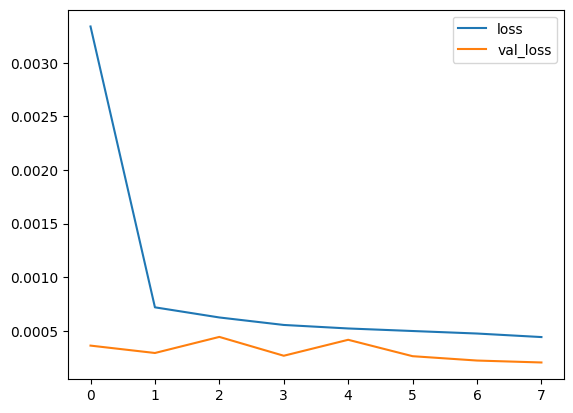

In [ ]:
# Losses Section
losses = pd.DataFrame(model.history.history)
losses.plot()

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


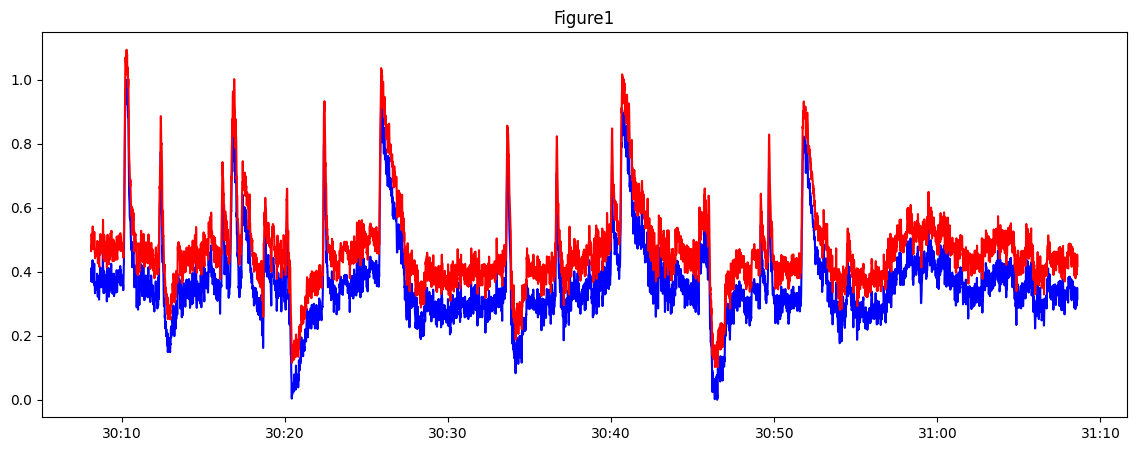

In [ ]:
#get the model predictions for all timepoints (same as linear)
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict+0.1,'r')
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


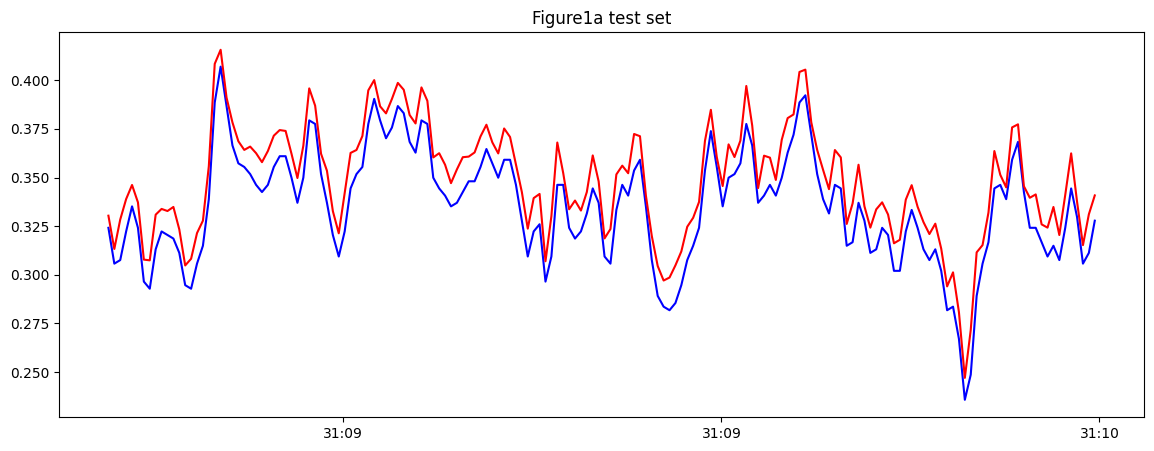

In [ ]:
#get the model predictions for all timepoints (only for non linear)
#this time, do it on the test set rather than the training set
predicted_outputs = model.predict(validation_generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
test_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=test.index[predict_length:])
test_orig = pd.DataFrame(data=scaled_test[predict_length-1:-1], columns=['eeg'], index=test.index[predict_length:len(scaled_test)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1a test set')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(test_orig,'b')
plt.plot(test_predict+0.01,'r')
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


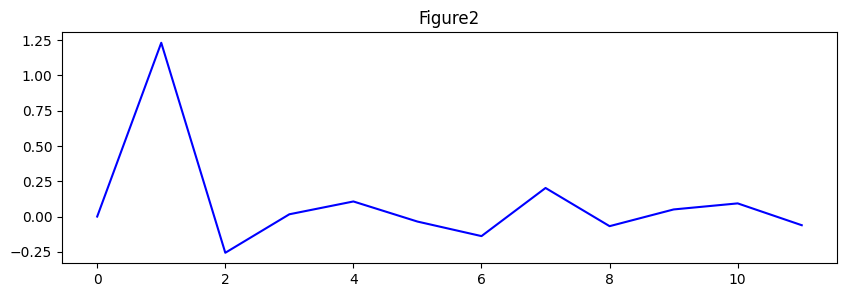

In [ ]:
# Impulse Section
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()

<Axes: title={'center': 'figure3'}>

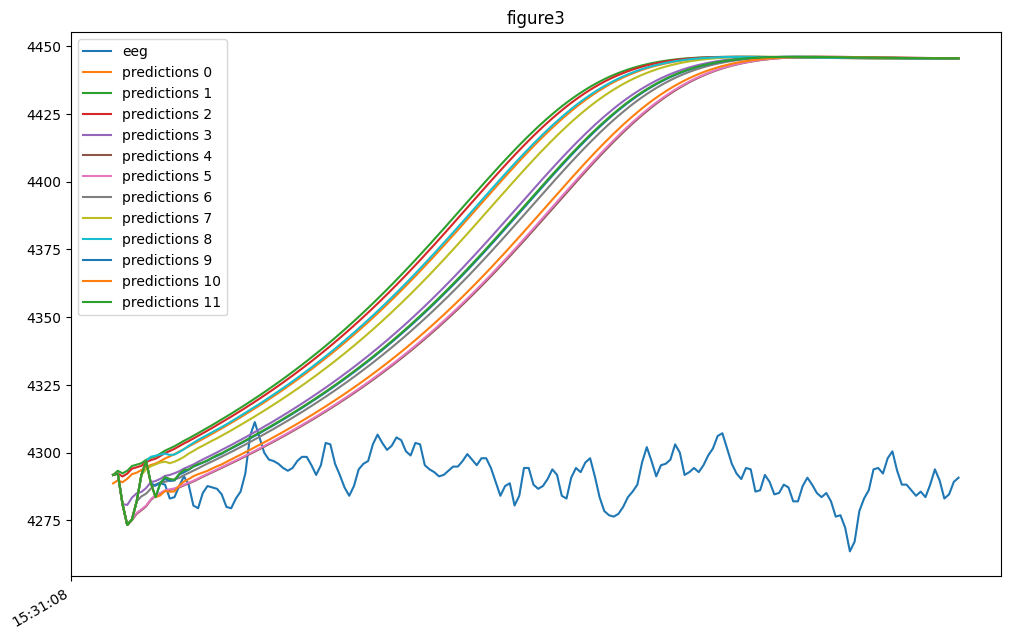

In [ ]:
#Test Prediction of Future Values (non linear only)
test_predict = test.copy()
for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):

      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch, verbose=0)[0]

      # store prediction
      test_predictions.append(current_pred)

      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8),title='figure3')

Question 3 Starts Here

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

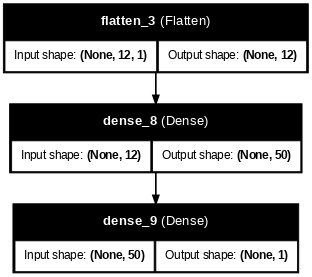

In [ ]:
## a custom network layer with 50 hidden nodes
from tensorflow.tools.docs.doc_controls import do_not_doc_inheritable
from matplotlib import use
from tensorflow.python.keras.engine.base_layer_utils import uses_keras_history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from keras.utils import plot_model

n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()
model.add(Flatten(input_shape = (predict_length, n_features)))
model.add(Dense(50, activation = custom_activation))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)

In [ ]:
#adds in early call back (didn't have this for linear)
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)


In [ ]:
#Generator Section
np.random.seed(57999719)
tf.random.set_seed(57999719)
model.fit(generator,epochs=8,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/8
7730/7745 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7745/7745 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0119 - val_loss: 3.5550e-04
Epoch 2/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8.0003e-04 - val_loss: 7.2471e-04
Epoch 3/8
7745/7745 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 6.6602e-04 - val_loss: 5.4026e-04


<Axes: >

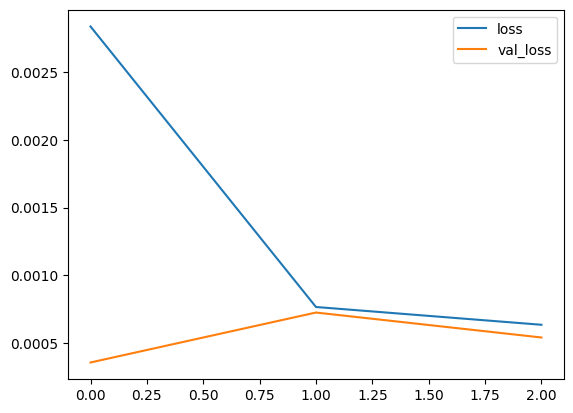

In [ ]:
# Losses Section
losses = pd.DataFrame(model.history.history)
losses.plot()

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


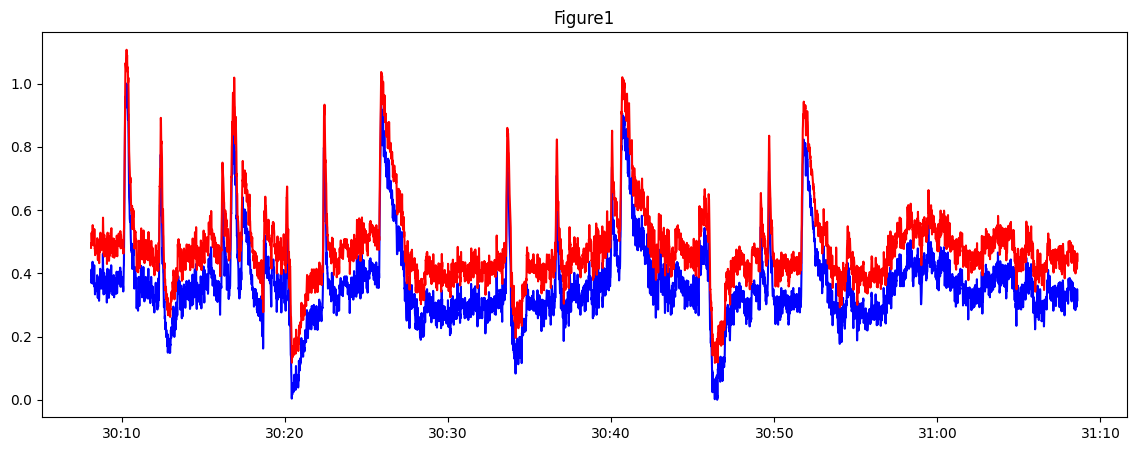

In [ ]:
#get the model predictions for all timepoints (same as linear)
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict+0.1,'r')
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


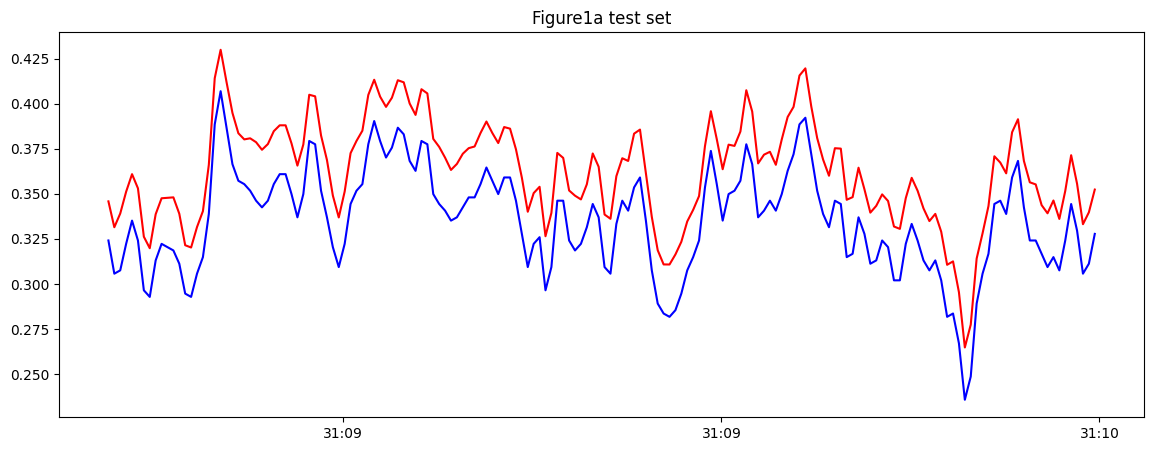

In [ ]:
#get the model predictions for all timepoints (only for non linear)
#this time, do it on the test set rather than the training set
predicted_outputs = model.predict(validation_generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
test_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=test.index[predict_length:])
test_orig = pd.DataFrame(data=scaled_test[predict_length-1:-1], columns=['eeg'], index=test.index[predict_length:len(scaled_test)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1a test set')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(test_orig,'b')
plt.plot(test_predict+0.01,'r')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


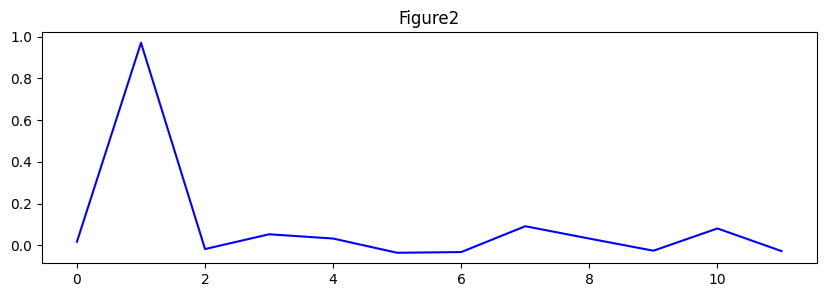

In [ ]:
# Impulse Section
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()

<Axes: title={'center': 'figure3'}>

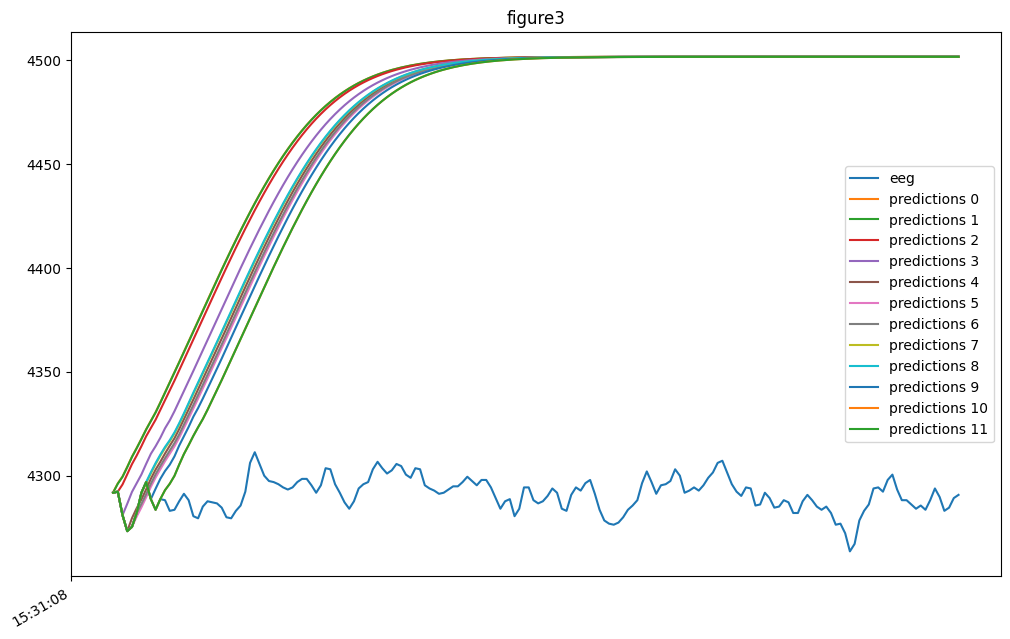

In [ ]:
#Test Prediction of Future Values (non linear only)
test_predict = test.copy()
for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):

      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch, verbose=0)[0]

      # store prediction
      test_predictions.append(current_pred)

      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8),title='figure3')

Question #4: Dense linear network layer with 50 hidden nodes and using a time buffer of predict_length = 24 timepoints.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

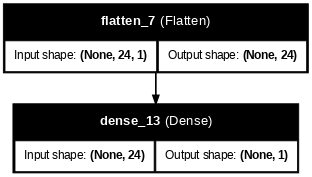

In [ ]:
predict_length = 24
n_features = 1  #this is the dimension of each sample x(t)
model = Sequential()  #method to build the network from the bottom, one layer at a time
#if you don't flatten, will get a separate single-input net for each time value
model.add(Flatten(input_shape = (predict_length, n_features)))  #defines the shape of the input
model.add(Dense(1))  #single output linear unit is the top layer
model.compile(optimizer='adam', loss='mse')  #specify the cost function and the descent rule
model.summary()  #show the model layer sizes
plot_model(model, show_shapes=True, show_layer_names=True, dpi=60)  #show a picture of the network


In [ ]:
#adds in early call back (didn't have this for linear)
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)

#Generator Section
generator = TimeseriesGenerator(scaled_train, scaled_train, length = predict_length, batch_size=1)
#rerun generator with 24 predict length
np.random.seed(57999719)
tf.random.set_seed(57999719)
model.compile(optimizer='adam', loss='mse') # Recompile the model
model.fit(generator,epochs=8,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7733/7733 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0018 - val_loss: 7.4058e-04
Epoch 2/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 9.5784e-04 - val_loss: 3.7878e-04
Epoch 3/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7.4529e-04 - val_loss: 5.2210e-04
Epoch 4/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 6.6990e-04 - val_loss: 2.6800e-04
Epoch 5/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.8231e-04 - val_loss: 5.7208e-04
Epoch 6/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.5238e-04 - val_loss: 2.3987e-04
Epoch 7/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.2012e-04 - val_loss: 2.2715e-04
Epoch 8/8
7733/7733 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9341e-04 - val_loss: 2.4453e-04


<Axes: >

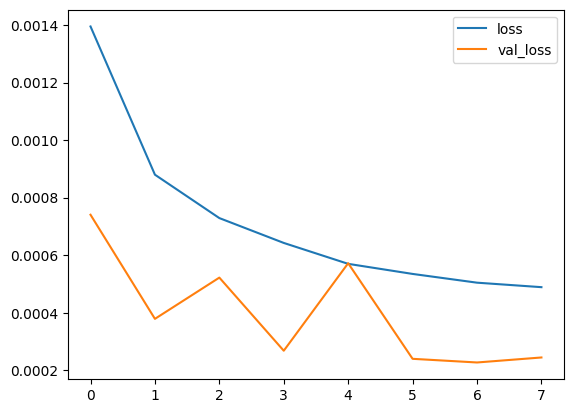

In [ ]:
# Losses Section
losses = pd.DataFrame(model.history.history)
losses.plot()

7733/7733 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


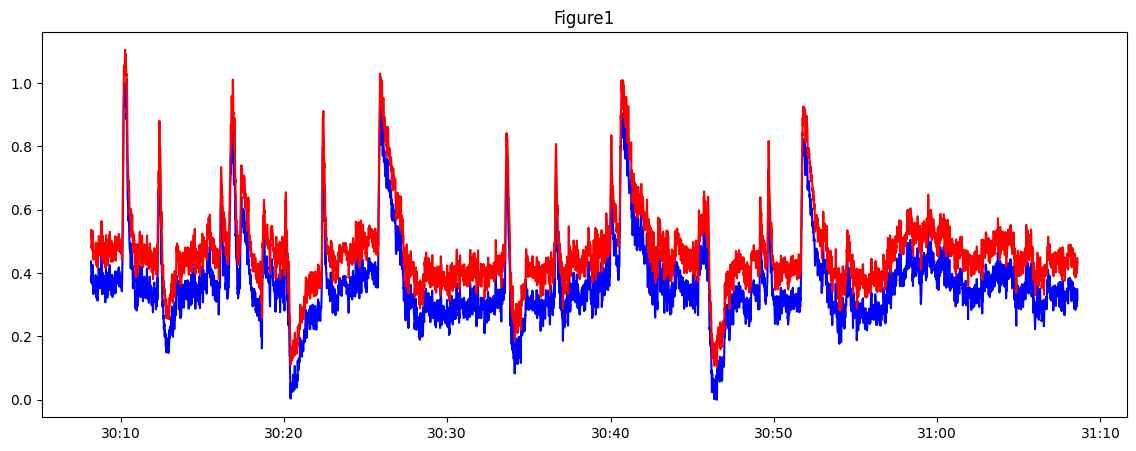

In [ ]:
#get the model predictions for all timepoints (same as linear)
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict+0.1,'r')
plt.show()


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


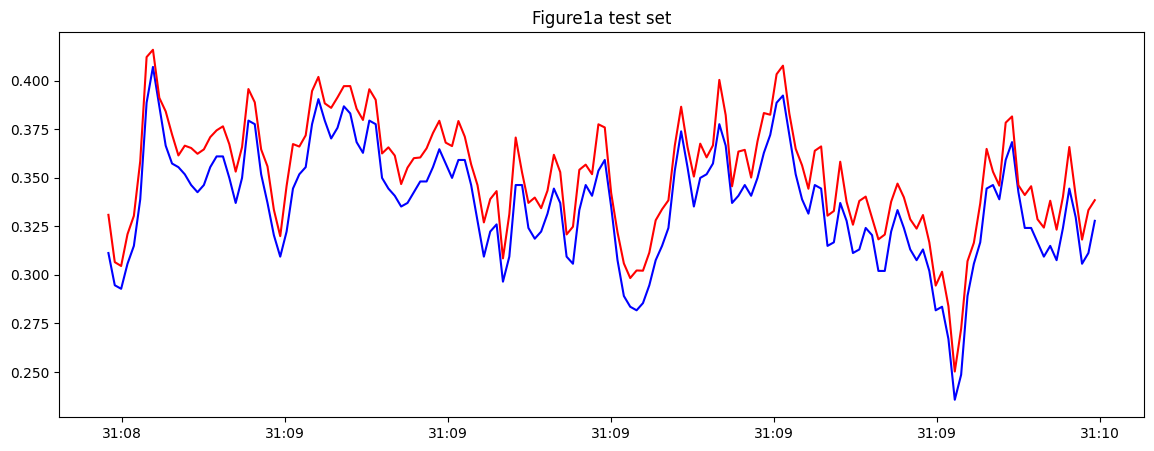

In [ ]:
#get the model predictions for all timepoints (only for non linear)
#this time, do it on the test set rather than the training set
predicted_outputs = model.predict(validation_generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
test_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=test.index[predict_length:])
test_orig = pd.DataFrame(data=scaled_test[predict_length-1:-1], columns=['eeg'], index=test.index[predict_length:len(scaled_test)])
plt.figure(figsize=(14,5),linewidth=1)
plt.title('Figure1a test set')
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(test_orig,'b')
plt.plot(test_predict+0.01,'r')
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


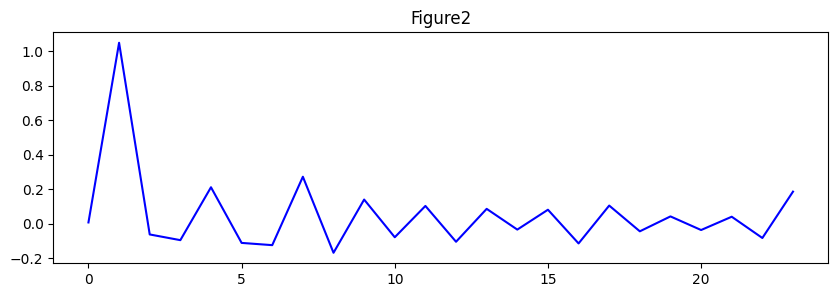

In [ ]:
# Impulse Section
impulse = np.zeros((2*predict_length,1))  #NOTE: this is a 2D tensor of width 1
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.title('Figure2')
plt.plot(impulse_response,'b')
plt.show()


<Axes: title={'center': 'figure3'}>

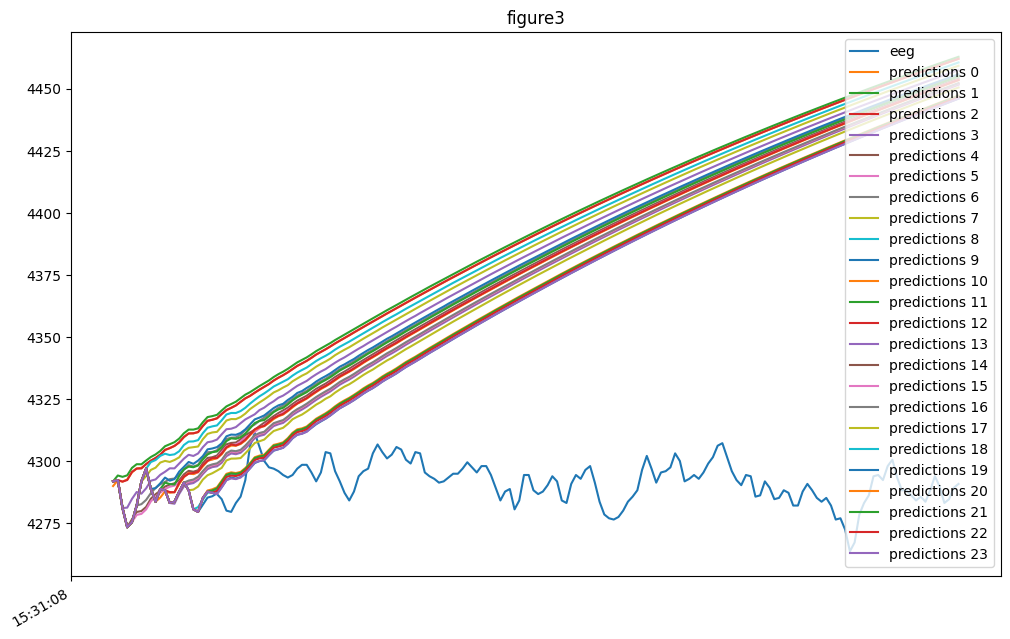

In [ ]:
#Test Prediction of Future Values (non linear only)
test_predict = test.copy()
for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):

      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch, verbose=0)[0]

      # store prediction
      test_predictions.append(current_pred)

      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8),title='figure3')